# Exercícios

### 1- Utilize a função `k-Vizinhos mais próximos` e implemente as seguintes etapas:

#### - Dado o conjunto de dados `Iris.csv`, faça uma função que recebe como parâmetros: (i) conjunto de dados, (ii) porcentagem de registros que serão usados para compor o conjunto de teste.
#### - Essa função deve retornar três elementos, (i) conjunto de treinamento com rótulo, (ii) conjunto de teste sem rótulo e (iii) rótulos dos elementos do conjunto de teste.
#### - Os elementos que irão compor o conjunto de teste devem ser selecionados aleatoriamente e não devem permanecer no conjunto de treino (Fazer a checagem).
#### - Utilize essa função de geração de conjuntos de dados e o método *k-Vizinhos mais próximos*, gere os conjuntos (treino e tete) considerando 20% dos registros para o conjunto de teste, faça a classificação do conjunto de teste e verifique quantas classificações corretas foram realizadas.


In [11]:
import random
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
def gerarTeste (dataset: pd.DataFrame, porcentagem):
  porcentagem = porcentagem / 100
  amostra = dataset.copy()

  tamanho = int(len(amostra) * porcentagem)
  while len(amostra) > tamanho:
    indices_atuais = list(amostra.index)

    if not indices_atuais:
      break

    indice_aleatorio = random.choice(indices_atuais)
    amostra = amostra.drop(index=indice_aleatorio)

  indices_para_remover = amostra.index
  treino = dataset.drop(index=indices_para_remover).reset_index(drop=True)

  amostra = amostra.reset_index(drop=True)
  sem_rotulo = amostra.drop(columns=['Species'])
  rotulos = amostra["Species"]

  return treino, sem_rotulo, rotulos

def dist_euclidiana(p1, p2):
    return sum((a - b) ** 2 for a, b in zip(p1, p2)) ** 0.5

def knn(teste, dataframe, k):
  teste = teste.to_numpy()
  dataframe = dataframe.to_numpy()

  rotulos = []

  for registro in teste:
    distancias = [(ponto[-1], dist_euclidiana(registro, ponto[:-1])) for ponto in dataframe]
    k_proximos = sorted(distancias, key=lambda x: x[1])[:k]

    rotulos_k = [r[0] for r in k_proximos]

    frequencia = {}

    for r in rotulos_k:
      if r in frequencia:
        frequencia[r] += 1
      else:
        frequencia[r] = 1

    max_freq = max(frequencia.values())
    empatados = [r for r, freq in frequencia.items() if freq == max_freq]

    if len(empatados) == 1:
      moda = empatados[0]
    else:
      candidatos = [x for x in k_proximos if x[0] in empatados]
      moda = sorted(candidatos, key=lambda x: x[1])[0][0]

    rotulos.append(moda)

  return rotulos


def verificaClassCorreta(classificado, rotulos, k):
  erro = 0
  for index, elemento in enumerate(classificado):
    if elemento != rotulos[index]:
      erro += 1
  return [k, erro]


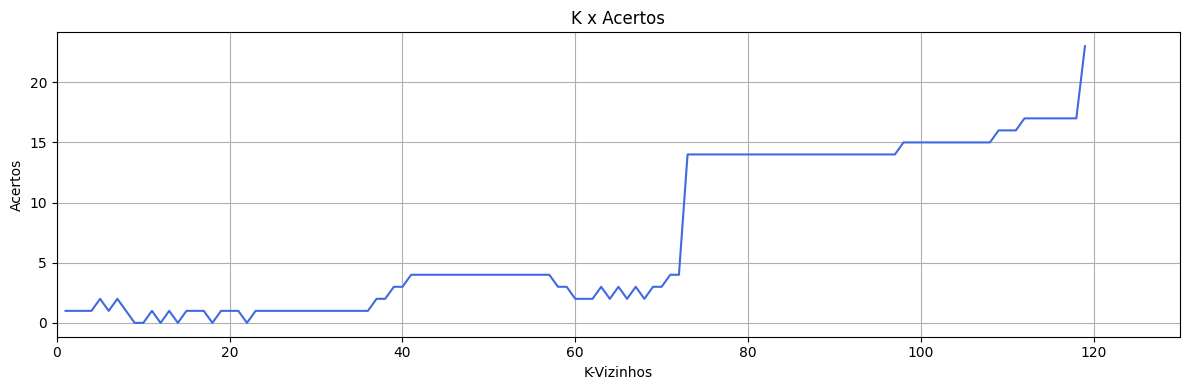

In [27]:
base_conhecimento = pd.read_csv('Iris.csv')
base_conhecimento = base_conhecimento.drop(columns=['Id'])
treino, sem_rotulo, rotulos = gerarTeste(base_conhecimento, 20)

melhores_k = []

for i in range(1, len(treino)):

  classificado = knn(sem_rotulo, treino, i)
  melhores_k.append(verificaClassCorreta(classificado, rotulos, i))

df = pd.DataFrame(melhores_k, columns=['K', 'acertos'])
pontos_maximos = df[df['acertos'] == 30]

plt.figure(figsize=(12, 4))
plt.plot(df['K'], df['acertos'], color='royalblue',linestyle='-', label='Acertos')
plt.scatter(pontos_maximos['K'], pontos_maximos['acertos'], color='red', s=10, zorder=5, label='Máximo (30 acertos)')

plt.xlim(0, 130)

plt.title('K x Acertos')
plt.xlabel('K-Vizinhos')
plt.ylabel('Acertos')
plt.grid(True)

plt.tight_layout()
plt.show()

### 2- Implemente um código que realize 10 iterações do código anterior, sempre gerando os conjuntos dentro de cada iteração.

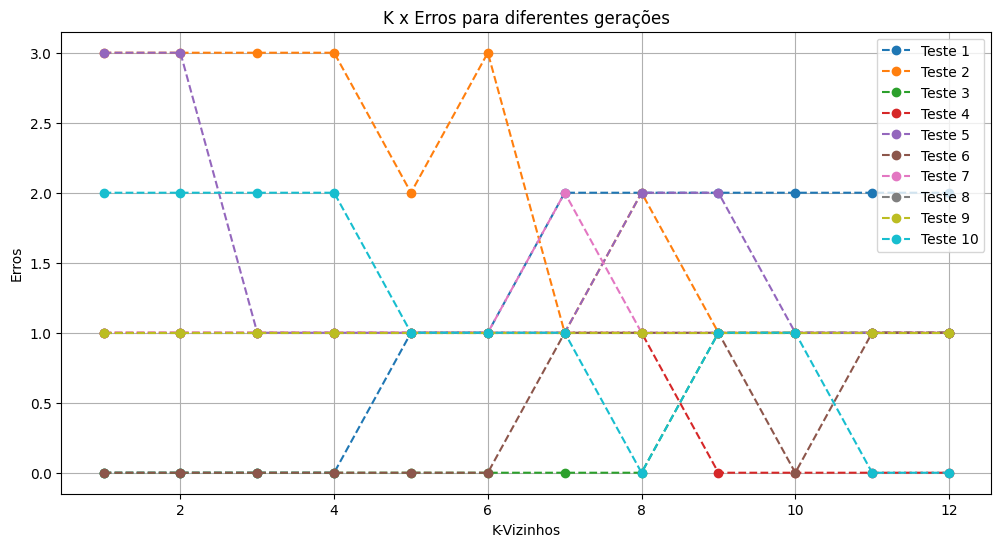

In [47]:
plt.figure(figsize=(12, 6))

for i in range(1, 11):
    treino, sem_rotulo, rotulos = gerarTeste(base_conhecimento, 20)

    melhores_k = []

    for k in range(1, int(len(base_conhecimento)**0.5 + 1)):
        classificado = knn(sem_rotulo, treino, k)
        melhores_k.append(verificaClassCorreta(classificado, rotulos, k))

    df = pd.DataFrame(melhores_k, columns=['K', 'erros'])
    plt.plot(df['K'], df['erros'], linestyle='--', label=f'Teste {i}', marker="o")

plt.title('K x Erros para diferentes gerações')
plt.xlabel('K-Vizinhos')
plt.ylabel('Erros')
plt.grid(True)
plt.legend()
plt.show()
